# (분류 1) 보험사기 탐지

## 문제
인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 보험사기 탐지 문제를 예로 들어 설명하겠습니다.

보험사기는 매우 크고 중요한 문제입니다. 다양한 사기가 계속 발생하고 있으며, 일부 수법은 일반화되어 있습니다. 따라서 미리 예측하면 많은 피해를 막을 수 있으며, 비용을 절약할 수 있습니다. 이러한 문제에 대하여 AI는 우리를 도울 수 있습니다.

## 데이터
이 실험에서는 [Kaggle](https://www.kaggle.com/buntyshah/auto-insurance-claims-data)에서 얻은 자동차 보험 청구 데이터로 실습할 것입니다. Kaggle은 데이터 전문가들이 모여 지식을 공유하고 서로 경쟁하여 보상을 받을 수 있는 데이터 공유 플랫폼입니다. 정리된 데이터가 Insurance.csv에 포함되어 있습니다.

## 0. 머신러닝 패키지 준비

In [ ]:
pip install xgboost --quiet

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## 1. 데이터집합 로드

In [ ]:
data = pd.read_csv('[Dataset]_Module11_(Insurance).csv').drop(['Unnamed: 0'], axis=1)
data.head()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,53300,0,5,1,2,71610,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,8,1,0,5070,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,35100,0,7,3,3,34650,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,48900,-62400,5,1,2,63400,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,66000,-46000,20,1,1,6500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.shape

(1000, 68)

## 2. 데이터 탐색

In [ ]:
# 데이터집합의 통계적 특성 조회
data.describe()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,0.065000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,0.246649,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


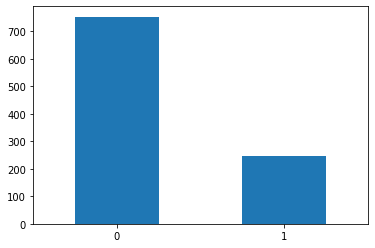

In [ ]:
# fraud_reported 열의 0과 1의 분포 확인
data['fraud_reported'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [ ]:
# feature와 label로 구분
X = data.drop(['fraud_reported'], axis=1)
y = data.fraud_reported

In [ ]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, random_state=1)

## 4. 분류기 모델 생성, 평가

### 4.1 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 명칭에 "회귀"라는 단어가 포함되어 있지만 실제로는 "분류" 알고리듬임

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       180
           1       0.78      0.64      0.70        70

    accuracy                           0.85       250
   macro avg       0.82      0.79      0.80       250
weighted avg       0.84      0.85      0.84       250



In [34]:
# 몇개의 데이터에 대한 예측
lr.predict(X_test[:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [35]:
# 몇 개의 데이터에 대한 확률 예측
lr.predict_proba(X_test[:10])

array([[0.94583816, 0.05416184],
       [0.92154015, 0.07845985],
       [0.98643912, 0.01356088],
       [0.93330503, 0.06669497],
       [0.95561562, 0.04438438],
       [0.4952143 , 0.5047857 ],
       [0.55026208, 0.44973792],
       [0.96293675, 0.03706325],
       [0.89161508, 0.10838492],
       [0.78502702, 0.21497298]])

### 4.2 k-최근접 이웃 (k-Nearest Neighbors, KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       180
           1       0.61      0.29      0.39        70

    accuracy                           0.75       250
   macro avg       0.69      0.61      0.61       250
weighted avg       0.72      0.75      0.71       250



### 4.3 결정 트리 (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       180
           1       0.61      0.49      0.54        70

    accuracy                           0.77       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.76      0.77      0.76       250



### 4.4 랜덤 포레스트 (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       180
           1       0.73      0.53      0.61        70

    accuracy                           0.81       250
   macro avg       0.78      0.73      0.74       250
weighted avg       0.80      0.81      0.80       250



### 4.5 XGBoost (eXtreme Gradient Boosting)


In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       180
           1       0.71      0.59      0.64        70

    accuracy                           0.82       250
   macro avg       0.78      0.75      0.76       250
weighted avg       0.81      0.82      0.81       250



### 4.6 다층 퍼셉트론 (Multi-Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y_pred = mlpc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       180
           1       0.70      0.56      0.62        70

    accuracy                           0.81       250
   macro avg       0.77      0.73      0.75       250
weighted avg       0.80      0.81      0.80       250



## 5. 더 좋은 모델 찾기
### 결정 트리 사례

In [ ]:
# 현재 사용중인 매개변수 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# 교차 검증 기능으로 wrap하여 훈련시킴
dtr = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=dict(criterion=['gini', 'entropy'],
                             max_depth=[2,4,6,8,10,12]), 
    n_iter=10, cv=3, 
    verbose=2, random_state=42, n_jobs=-1)
dtr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12]},
                   random_state=42, verbose=2)

In [ ]:
y_pred = dtr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       180
           1       0.64      0.66      0.65        70

    accuracy                           0.80       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.80      0.80      0.80       250



이 결과가 4.3에서 생성한 결정 트리 모델 dtc에 비해 더 나은 결과를 산출했나요? 제3주차 강의에서 학습한 FLAML을 사용한 경우과 비교할 경우는 어떠한가요?

## 6. 모델 설명

### 로지스틱 회귀 사례

                                   feature      coef
0                            capital-gains -0.010325
1                             capital-loss -0.079481
2                 incident_hour_of_the_day -0.070583
3              number_of_vehicles_involved  0.189228
4                                witnesses  0.087786
..                                     ...       ...
62       policy_annual_premium_groups_high -0.031996
63        policy_annual_premium_groups_low  0.081900
64     policy_annual_premium_groups_medium -0.052027
65  policy_annual_premium_groups_very high -0.123407
66   policy_annual_premium_groups_very low  0.225887

[67 rows x 2 columns]


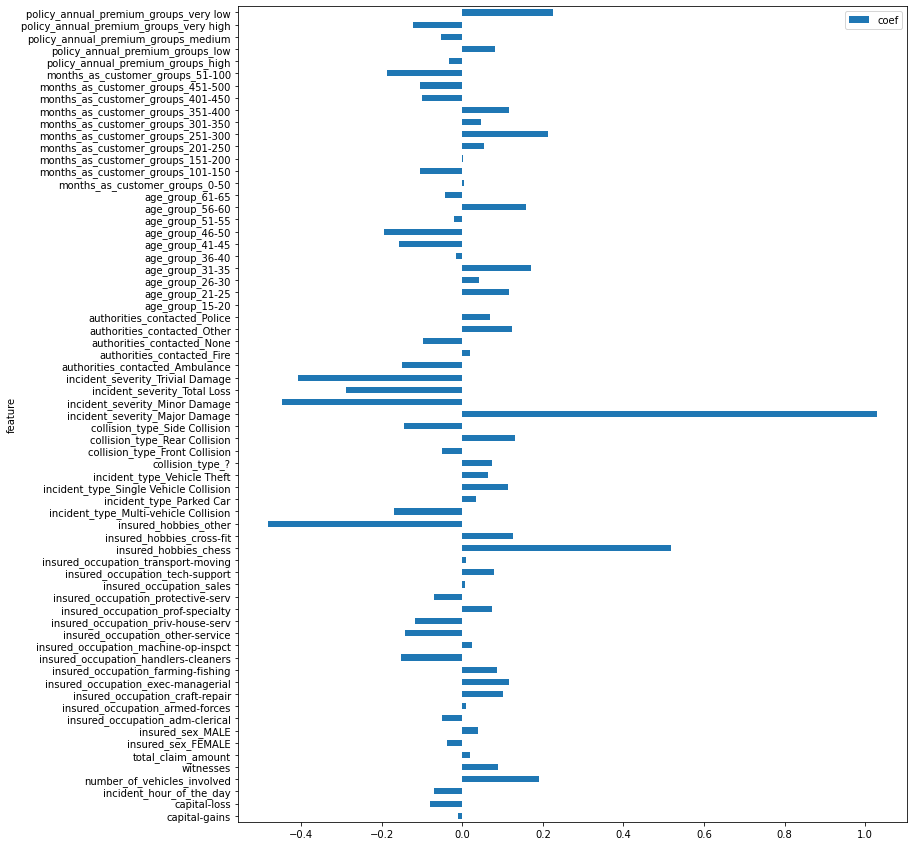

In [ ]:
lr_exp = pd.DataFrame({'feature': X.columns.tolist(), 'coef': lr.coef_[0]})
print(lr_exp)
lr_exp.plot(kind='barh', x='feature', y='coef', figsize=(12, 15))

### 결정 트리 사례

In [ ]:
from sklearn import tree
plt.figure(figsize=(10, 5), dpi=600)
_ = tree.plot_tree(dtc, feature_names=X.columns.tolist(), max_depth=3, filled=None)

## 결론

Scikit-Learn은 분류 문제를 위한 다양한 머신러닝 알고리듬을 제공합니다. 각 알고리듬은 각기 다른 방법으로 학습하지만 Scikit-Learn은 모든 학습에 "fit", 예측에 "predict" 메서드를 사용하는 것과 같은 방법으로 단일화된 인터페이스를 제공합니다. 그 결과 새로운 알고리듬을 학습하더라도 프로그래밍 스타일은 기존과 동일한 스타일을 유지할 수 있습니다.

Scikit-Learn 수준의 머신러닝 프로그래밍은 FLAML이나 AutoKeras과 같은 AutoML 기능을 사용할 때와는 달리 어떤 알고리듬을 사용하지 직접 결정해야 하고, 선택된 알고리듬을 위한 최적 하이퍼매개변수도 직접 결정하거나 교차검증과 같은 방법으로 직접 찾아야 합니다. 그러나 경험 많은 개발자가 많은 노력을 투입하면 AutoML을 사용할 때보다 적은 시간에 더 정교하게 최적화된 모델을 얻을 수 있는 가능성도 있습니다.

머신러닝 모델에 대한 설명 기능은 사용된 알고리듬의 종류에 따라 다양한 방법으로 조회하여야 하며, 그 결과의 형태도 균일하지 않습니다. 모델을 블랙박스로 간주하고 그 모델의 기능을 모방하는 대리모델을 사용하여 알고리듬에 종속되지 않은 방법으로 모델이나 예측을 설명하는 방법도 있습니다.